<div style="background-color: rgb(173, 216, 230); padding: 10px;">
    <h1 style="color: darkblue; font-family: Arial, sans-serif; text-align: center;">
        Introduction
    </h1>
</div>

<span style="font-size:18px ;font-weight: bold;">About the Dataset</span>    
**Based on the human’s physical activity, the stress levels of the human being are detected and analyzed. A dataset of 2001 samples is provided for human body humidity, body temperature and the number of steps taken by the user. Three different classifications of stress are analyzed such as low stress, normal stress, and high stress.**  
<span style="font-size:18px ;font-weight: bold;">About the Notebook</span>    
**In this notebook ,I have performed basic EDA ,visualizations ,modelling for stress prediction and deployed the model.**



<div style="background-color: rgb(173, 216, 230); ">
    <h1 style="color: darkblue; font-family: Arial, sans-serif; text-align: center;">
        Importing necessary libraries
    </h1>
</div>


In [33]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB ? eta -:--:--
   ------------ --------------------------- 92.2/294.9 kB 1.0 MB/s eta 0:00:01
   ----------------------- ---------------- 174.1/294.9 kB 1.5 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.5 MB/s eta 0:00:00


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<div style="background-color: rgb(173, 216, 230); ">
    <h1 style="color: darkblue; font-family: Arial, sans-serif; text-align: center;">
        Data Collection
    </h1>
</div>

In [2]:
df=pd.read_csv("Stress-Lysis.csv")

<div style="background-color: rgb(173, 216, 230); ">
    <h1 style="color: darkblue; font-family: Arial, sans-serif; text-align: center;">
        EDA
    </h1>
</div>

In [10]:
df.shape

(2001, 4)

Observation : The dataset consist of 2001 rows and 4 columns


In [11]:
df.head() #returns the first five rows of the dataset

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


In [12]:
df.info()  # returns index dtype, column dtypes, non-null values, and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      2001 non-null   float64
 1   Temperature   2001 non-null   float64
 2   Step count    2001 non-null   int64  
 3   Stress Level  2001 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 62.7 KB


In [13]:
df.describe()   #returns the statistical summary of the data

,Humidity,Temperature,Step count,Stress Level
count,2001.000000,2001.000000,2001.000000,2001.000000
mean,20.000000,89.000000,100.141429,1.104448
std,5.777833,5.777833,58.182948,0.771094
min,10.000000,79.000000,0.000000,0.000000
25%,15.000000,84.000000,50.000000,0.000000
50%,20.000000,89.000000,101.000000,1.000000
75%,25.000000,94.000000,150.000000,2.000000
max,30.000000,99.000000,200.000000,2.000000


Renaming columns

In [3]:
df = df.rename(columns = {'Step count': 'Step_count', 'Stress Level': 'Stress_level'})
df.head(1)

,Humidity,Temperature,Step_count,Stress_level
0,21.33,90.33,123,1


In [30]:
df['Stress_level'].unique() # returns unique stress level values

array([1, 2, 0], dtype=int64)

In [14]:
((df['Stress Level'].value_counts()) / len(df)) * 100
#returns the percentage of each type of stress values.

Stress Level
1    39.480260
2    35.482259
0    25.037481
Name: count, dtype: float64

In [17]:
df.isnull().sum() 

Humidity        0
Temperature     0
Step count      0
Stress Level    0
dtype: int64

Observation : Data consist of no null values


In [21]:
df.duplicated().sum()

0

Observation : Data consist of no duplicate rows

**Checking the correlation between columns**

In [15]:
correlation = df.corr()
correlation

,Humidity,Temperature,Step_count,Stress_level
Humidity,1.000000,1.000000,0.870486,0.936036
Temperature,1.000000,1.000000,0.870486,0.936036
Step_count,0.870486,0.870486,1.000000,0.832623
Stress_level,0.936036,0.936036,0.832623,1.000000


In [4]:
skewness=df.skew()
skewness

Humidity        1.179993e-18
Temperature    -1.297993e-17
Step count     -6.998237e-03
Stress Level   -1.811032e-01
dtype: float64

**Reducing Skewness**

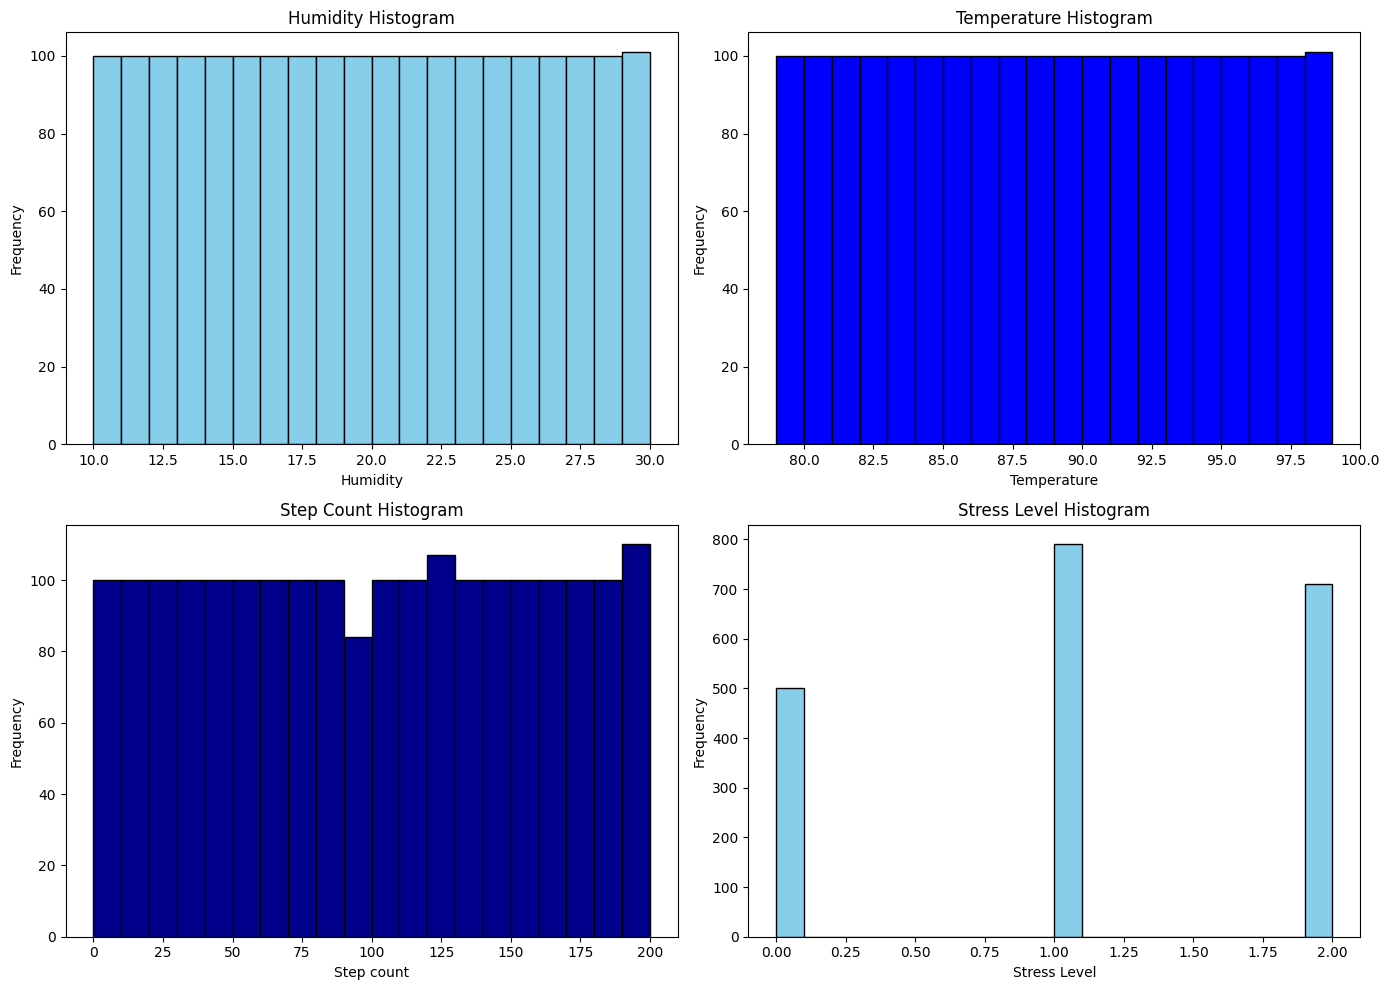

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot Humidity
axes[0, 0].hist(df['Humidity'], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Humidity Histogram')
axes[0, 0].set_xlabel('Humidity')
axes[0, 0].set_ylabel('Frequency')

# Plot Temperature
axes[0, 1].hist(df['Temperature'], bins=20, color='blue', edgecolor='black')
axes[0, 1].set_title('Temperature Histogram')
axes[0, 1].set_xlabel('Temperature')
axes[0, 1].set_ylabel('Frequency')

# Plot Step count
axes[1, 0].hist(df['Step_count'], bins=20, color='darkblue', edgecolor='black')
axes[1, 0].set_title('Step Count Histogram')
axes[1, 0].set_xlabel('Step count')
axes[1, 0].set_ylabel('Frequency')

# Plot Stress Level
axes[1, 1].hist(df['Stress_level'], bins=20, color='skyblue', edgecolor='black')
axes[1, 1].set_title('Stress Level Histogram')
axes[1, 1].set_xlabel('Stress Level')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

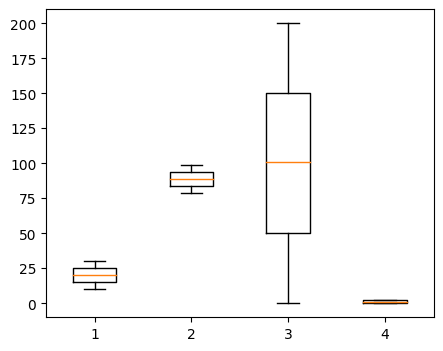

In [11]:
plt.figure(figsize=(5,4))
plt.boxplot(df)
plt.show()

**Visualizations**

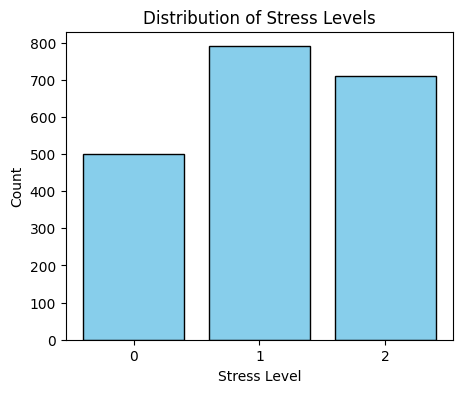

In [28]:
stress_counts = df['Stress_level'].value_counts().sort_index()
plt.figure(figsize=(5,4))
plt.bar(stress_counts.index, stress_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.title('Distribution of Stress Levels')
plt.xticks(stress_counts.index)  
plt.show()

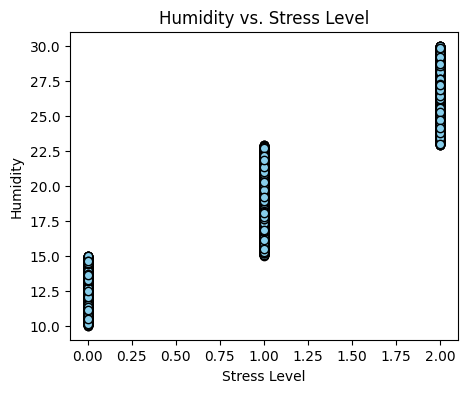

In [27]:
plt.figure(figsize=(5, 4)) 
plt.scatter(df['Stress_level'], df['Humidity'], color='skyblue', edgecolor='black')
plt.xlabel('Stress Level')
plt.ylabel('Humidity')
plt.title('Humidity vs. Stress Level')
plt.show()

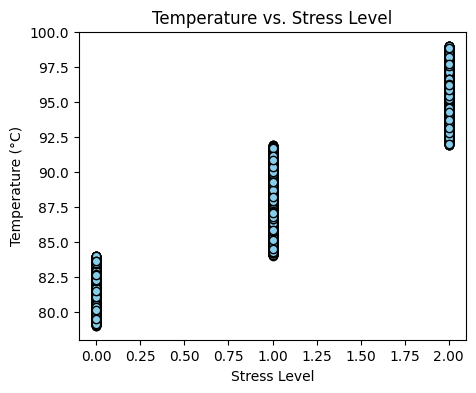

In [29]:
plt.figure(figsize=(5, 4)) 
plt.scatter(df['Stress_level'], df['Temperature'], color='skyblue', edgecolor='black')
plt.xlabel('Stress Level')
plt.ylabel('Temperature (°C)')
plt.title('Temperature vs. Stress Level')
plt.show()

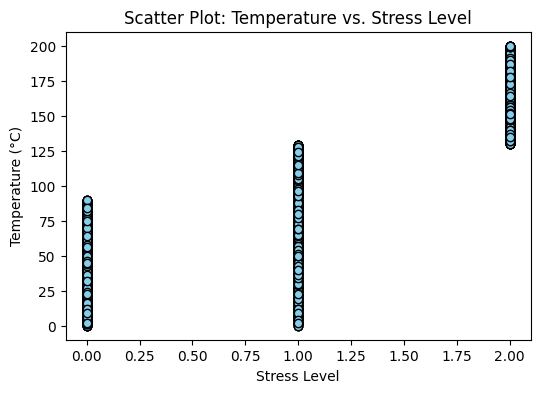

In [30]:
plt.figure(figsize=(6, 4)) 
plt.scatter(df['Stress_level'], df['Step_count'], color='skyblue', edgecolor='black')
plt.xlabel('Stress Level')
plt.ylabel('Step Count')
plt.title('Step Count vs. Stress Level')
plt.show()

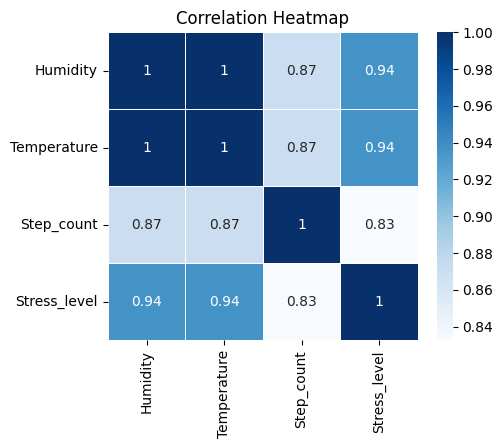

In [39]:
plt.figure(figsize=(5, 4)) 
sns.heatmap(correlation, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<div style="background-color: rgb(173, 216, 230); ">
    <h1 style="color: darkblue; font-family: Arial, sans-serif; text-align: center;">
        Data Preprocessing
    </h1>
</div>

In [6]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import sklearn
from sklearn.model_selection import train_test_split
X=df.drop(['Stress_level'],axis=1)
y=df['Stress_level']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

<div style="background-color: rgb(173, 216, 230); ">
    <h1 style="color: darkblue; font-family: Arial, sans-serif; text-align: center;">
        Modelling
    </h1>
</div>

**Logistic Regression**

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
regressor = LogisticRegression(random_state=2)
regressor.fit(X_train,y_train)

LogisticRegression(random_state=2)

In [12]:
y_pred = regressor.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Print the classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.9975062344139651
Confusion Matrix:
[[ 83   0   0]
 [  0 166   0]
 [  0   1 151]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       0.99      1.00      1.00       166
           2       1.00      0.99      1.00       152

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401



**Random Forest Classification**

In [5]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,max_depth=5,random_state=2)
model.fit(X,y)
prediction = model.predict(X_test)

In [8]:
y_pred = model.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00       166
           2       1.00      1.00      1.00       152

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401

Confusion Matrix:
[[ 83   0   0]
 [  0 166   0]
 [  0   0 152]]


**Saving the trained model**

In [9]:
import pickle
with open ('stress_prediction.pickle','wb') as f:
    pickle.dump(model,f)

**Making Predictions**

In [9]:
def predict(humidity,temperature,step_count):
    x = np.zeros(len(X.columns))
    x[0] = humidity
    x[1] = temperature
    x[2] = step_count

    return model.predict([x])[0]

In [10]:
predict(27,97,196)

2

In [11]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))